In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder

In [2]:
import numpy as np

def rmse(y_true, y_pred):
    """
    Calculate the Root Mean Square Error (RMSE) between actual and predicted values.
    
    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values.
    
    Returns:
    float: RMSE value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [3]:
#importing the raw data
rawdata = pd.read_csv("datam.csv", low_memory=False)
#filtering out the data which has stability meansurement of T80
data = rawdata.loc[pd.to_numeric(rawdata['JV_hysteresis_index'], errors='coerce').notnull()]
data = data.loc[pd.to_numeric(rawdata['TS80m'], errors='coerce').notnull()]
data = data[~data.apply(lambda row: row.astype(str).str.contains('ISOS-D').any(), axis=1)]
display(data)
data.to_excel('Stability_data.xlsx')
#display(data.columns.tolist())
print(data.shape)

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data,Tolerance factor,TS80,Atemperature,Ahumidity,Alight,TS80m
42,314,314,Alberto Garcia-Fernandez,False,10.1016/j.joule.2017.11.006,Zhu et al.,2017/12/1,Joule,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.911521,0.90000,18.457200,2.00,1.000000,33.222872
48,379,379,Alberto Garcia-Fernandez,False,10.1039/c8ta03608j,Tsai et al.,2018/6/16,Journal of Materials Chemistry A,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.978228,0.19382,0.855491,2.50,0.199526,0.082709
120,728,728,Aman Anand,False,10.1002/smll.201904372,Chen et al.,2019/10/14,Small,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.969921,186.47800,0.855491,1.00,1.000000,159.530317
121,729,729,Aman Anand,False,10.1002/smll.201904372,Chen et al.,2019/10/14,Small,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.969921,2637.35000,0.855491,1.00,1.000000,2256.230131
136,780,780,Aman Anand,False,10.1002/adfm.201807850,Yuan et al.,2019/2/1,Advanced Functional Materials,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.975348,4.84550,0.855491,2.00,1.000000,8.290567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,42393,42393,Rafael Betancur,False,10.1021/acs.jpclett.0c00923,Meng et al.,2020/3/27,The Journal of Physical Chemistry Letters,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,NaN,870.06900,0.855491,2.00,1.000000,1488.673019
7400,42397,42397,Rafael Betancur,False,10.1021/acsami.0c05527,Liu et al.,2020/5/19,ACS Applied Materials & Interfaces,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.911521,355.80800,0.855491,1.75,1.000000,532.683670
7403,42400,42400,Rafael Betancur,False,10.1021/acsami.0c05527,Liu et al.,2020/5/19,ACS Applied Materials & Interfaces,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.911521,168.00000,0.855491,1.75,1.000000,251.514459
7406,42403,42403,Rafael Betancur,False,10.1021/acsami.0c05527,Liu et al.,2020/5/19,ACS Applied Materials & Interfaces,True,Historic dataset on 2020 11 22_v7.xlsx,...,False,NaN,False,NaN,0.911521,84.00000,0.855491,1.75,1.000000,125.757230


(504, 414)


In [5]:
#preprocession of categorical variables
cat_vars = ['Cell_architecture','Cell_stack_sequence','ETL_deposition_procedure','Perovskite_composition_a_ions',
           'Perovskite_composition_c_ions','HTL_stack_sequence','Backcontact_stack_sequence']
jv =['JV_reverse_scan_Voc','JV_reverse_scan_Jsc','JV_reverse_scan_FF', 'JV_reverse_scan_PCE'
,'JV_forward_scan_Voc',	'JV_forward_scan_Jsc',	'JV_forward_scan_FF',	'JV_forward_scan_PCE'
]
jvdata=pd.DataFrame(data[jv])
#print(jvdata)
encoder=OneHotEncoder()
cat_data = encoder.fit_transform(data[cat_vars])
cat_column_names = encoder.get_feature_names_out()
#display(cat_data)

catdata = pd.DataFrame(cat_data.toarray(), columns = cat_column_names)
catdata.reset_index(drop=True, inplace = True)
stadata = pd.DataFrame(data['TS80m'])
stadata.reset_index(drop=True, inplace=True)
jvdata.reset_index(drop=True,inplace=True)
fdata = pd.concat([catdata,jvdata, stadata], axis=1)


print(fdata.shape)


fdata.to_excel('formatted data for stablity.xlsx')

(504, 439)


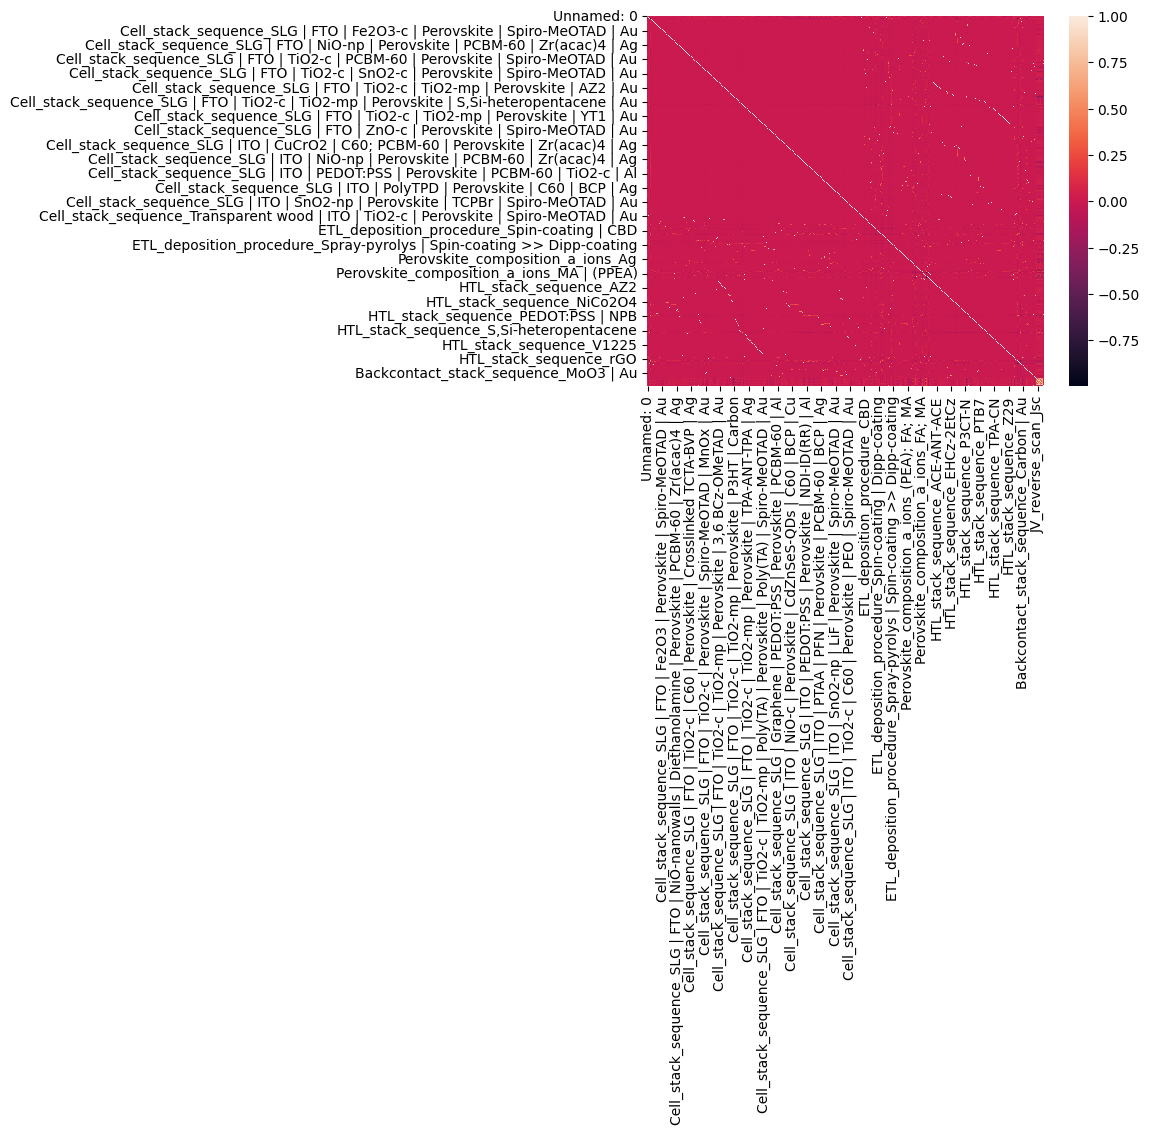

In [3]:
fdata =pd.read_excel('formatted data for stablity.xlsx')
#fdata = fdata.drop(columns=['Unnamed: 0'], axis=1)
cor = fdata.corr()
sn.heatmap(cor)
plt.show()


In [4]:
fdata = pd.read_excel('formatted data for stablity.xlsx')
#seggregating label and features
x,y = fdata.drop(columns=['TS80m']), fdata['TS80m']

#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 42,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size = 0.4, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = RandomForestRegressor()
model.fit(x, y)

# Get feature importances
feature_importances = model.feature_importances_

# Select top N features with highest importance scores
top_features = x.columns[np.argsort(feature_importances)[::-1][:50]].tolist()


In [10]:
print(top_features)

['Backcontact_stack_sequence_PEDOT:PSS | ITO | SLG', 'HTL_stack_sequence_PCPD2FBT:BCF', 'Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | PCPD2FBT:BCF | PEDOT:PSS | ITO | SLG', 'Unnamed: 0', 'Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | Carbon', 'ETL_deposition_procedure_Unknown | Spin-coating', 'JV_reverse_scan_FF', 'ETL_deposition_procedure_Dipp-coating', 'JV_reverse_scan_Voc', 'Cell_stack_sequence_SLG | ITO | PEDOT:PSS | Perovskite | NDI-ID(RR) | Al', 'Cell_stack_sequence_SLG | ITO | PEDOT:PSS | Perovskite | NDI-ID(RS) | Al', 'JV_reverse_scan_PCE', 'JV_reverse_scan_Jsc', 'JV_forward_scan_FF', 'HTL_stack_sequence_18-crown-6 ether | CuSCN', 'JV_forward_scan_Voc', 'JV_forward_scan_Jsc', 'Backcontact_stack_sequence_rGO | Au', 'Perovskite_composition_a_ions_Cs', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | PIF8-TAA | Au', 'HTL_stack_sequence_PIF8-TAA', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | CuSCN | rGO | Au', 'ETL_deposition_pro

In [5]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_estimators=250, max_depth=50, random_state=42)
modelRF.fit(x_train, y_train)

print(modelRF.score)

<bound method RegressorMixin.score of RandomForestRegressor(max_depth=50, n_estimators=250, random_state=42)>


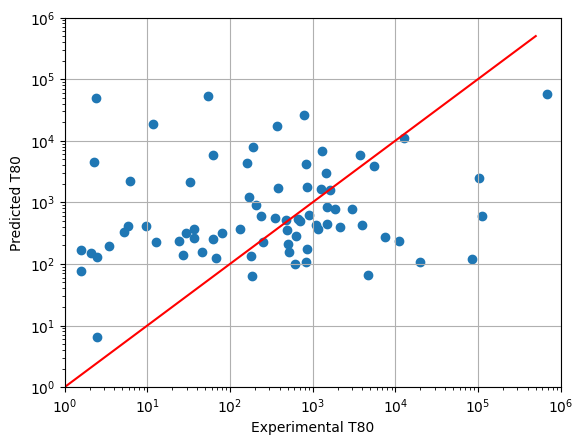

In [7]:
y_predictedRF = modelRF.predict(x_test)
xt = [0,500000]
yt = [0,500000]

plt.scatter(y_test,y_predictedRF)
plt.plot(xt,yt, color ='r')
plt.xlim(1,10**6)
plt.ylim(1,10**6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Experimental T80')
plt.ylabel('Predicted T80')
plt.grid()
plt.savefig('Figure_6', dpi=600, format = 'png')
plt.show()




In [50]:
print(rmse(y_predictedRF,y_test))

75193.8854828267


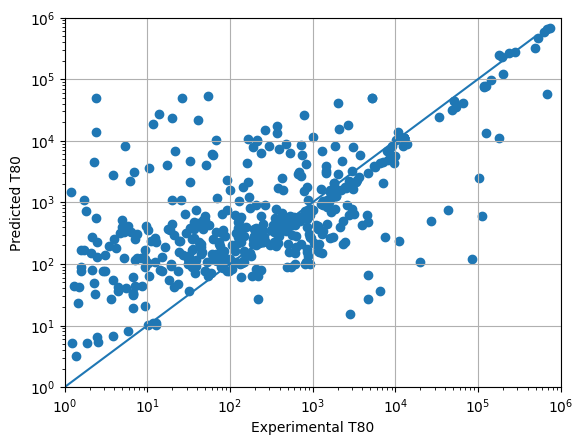

In [45]:
y_predicted_fullRF = modelRF.predict(x)
xt = [0,500000]
yt = [0,500000]

plt.scatter(y,y_predicted_fullRF)
plt.plot(xt,yt)
plt.xlim(1,10**6)
plt.ylim(1,10**6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Experimental T80')
plt.ylabel('Predicted T80')
plt.grid()



In [46]:
rmse(y,y_predicted_fullRF)

33013.350621695565

In [21]:
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)




# Create a sequential model
modelNN = models.Sequential()

# Add an input layer with  variables
modelNN.add(layers.InputLayer(input_shape=(439,)))

# Add hidden layers
modelNN.add(layers.Dense(128, activation='relu'))
modelNN.add(layers.Dense(64, activation='relu'))
modelNN.add(layers.Dense(16, activation='relu'))

# Add the output layer with one neuron (for regression)
modelNN.add(layers.Dense(1))

# Compile the model
modelNN.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mae'])

# Define a ModelCheckpoint callback

model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',  # Change monitor to 'val_accuracy'
    save_best_only=True,
    save_weights_only=False,
    mode='max',  # Use 'max' for accuracy
    verbose=1
)


In [19]:
X_train, x_test, Y_train, y_test = train_test_split(Xshort,Yshort, test_size = 0.15, random_state = 42,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size = 0.4, random_state=42)
print(x_train.shape)

(256, 439)


In [22]:
history = modelNN.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_val, y_val), callbacks=[model_checkpoint])


Epoch 1/1000
1/8 [==>...........................] - ETA: 18s - loss: 27194257408.0000 - mae: 47735.3203
Epoch 1: val_loss improved from -inf to 303916800.00000, saving model to best_model.h5
8/8 [==============================] - 3s 38ms/step - loss: 8876617728.0000 - mae: 20288.1660 - val_loss: 303916800.0000 - val_mae: 3388.5728
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 2838234112.0000 - mae: 15248.9512
Epoch 2: val_loss did not improve from 303916800.00000
8/8 [==============================] - 0s 13ms/step - loss: 8874498048.0000 - mae: 20266.3223 - val_loss: 303708736.0000 - val_mae: 3369.8220
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 15595982848.0000 - mae: 38963.1992
Epoch 3: val_loss did not improve from 303916800.00000
8/8 [==============================] - 0s 13ms/step - loss: 8872330240.0000 - mae: 20255.6367 - val_loss: 303436768.0000 - val_mae: 3353.5649
Epoch 4/1000
6/8 [=====================>........] - ETA: 0s - loss: 

3/3 [==============================] - 0s 4ms/step


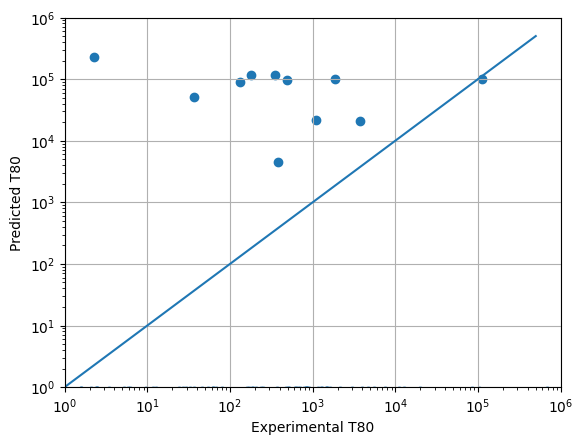

In [47]:
from tensorflow.keras.models import load_model
bestmodelNN = load_model('best_model.h5')
ypredictNN = bestmodelNN.predict(x_test)
plt.scatter(y_test,ypredictNN)
plt.plot(xt,yt)
plt.xlim(1,10**6)
plt.ylim(1,10**6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Experimental T80')
plt.ylabel('Predicted T80')
plt.grid()

16/16 [==============================] - 0s 2ms/step


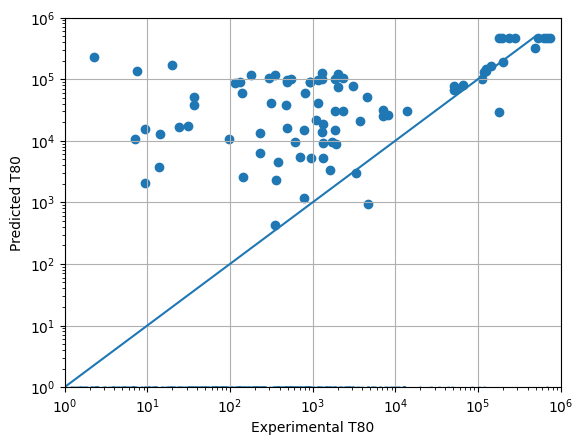

In [48]:
ypredictNN_full = bestmodelNN.predict(x)
plt.scatter(y,ypredictNN_full)
plt.plot(xt,yt)
plt.xlim(1,10**6)
plt.ylim(1,10**6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Experimental T80')
plt.ylabel('Predicted T80')
plt.grid()

In [34]:
Xshort = fdata.drop(columns=['TS80m'])
Yshort = fdata['TS80m']

In [37]:
shortdata = fdata[['HTL_stack_sequence_PCPD2FBT:BCF', 'Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | PCPD2FBT:BCF | PEDOT:PSS | ITO | SLG', 'Backcontact_stack_sequence_PEDOT:PSS | ITO | SLG', 'Unnamed: 0', 'Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | Carbon', 'ETL_deposition_procedure_Unknown | Spin-coating', 'JV_reverse_scan_FF', 'Cell_stack_sequence_SLG | ITO | PEDOT:PSS | Perovskite | NDI-ID(RR) | Al', 'ETL_deposition_procedure_Dipp-coating', 'JV_reverse_scan_Voc', 'JV_forward_scan_Voc', 'Cell_stack_sequence_SLG | ITO | PEDOT:PSS | Perovskite | NDI-ID(RS) | Al', 'JV_forward_scan_Jsc', 'JV_forward_scan_FF', 'JV_forward_scan_PCE', 'JV_reverse_scan_Jsc', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | CuSCN | rGO | Au', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | PIF8-TAA | Au', 'Backcontact_stack_sequence_rGO | Au', 'HTL_stack_sequence_18-crown-6 ether | CuSCN', 'JV_reverse_scan_PCE', 'HTL_stack_sequence_PIF8-TAA', 'Cell_stack_sequence_SLG | Graphene | PEDOT:PSS | Perovskite | PCBM-60 | Al', 'Cell_stack_sequence_SLG | ITO | NiO-c | Perovskite | PCBM-60 | BCP | AZO-c | Ag', 'Cell_stack_sequence_PDMS | Graphene | PEDOT:PSS | Perovskite | PCBM-60 | Al', 'Perovskite_composition_a_ions_Cs', 'Cell_stack_sequence_SLG | ITO | NiO-np | Perovskite | PCBM-60 | TiO2-c | Ag', 'HTL_stack_sequence_PF8-TAA', 'HTL_stack_sequence_PPDT2FBT', 'Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | PPDT2FBT | Au', 'ETL_deposition_procedure_Spin-coating | Spin-coating | ALD', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | PF8-TAA | Au', 'ETL_deposition_procedure_Spray-pyrolys | Spin-coating', 'ETL_deposition_procedure_Spray-pyrolys | Spin-coating >> Dipp-coating', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | P3HT | Au', 'Perovskite_composition_c_ions_Br; I', 'Perovskite_composition_a_ions_Cs; MA', 'Cell_stack_sequence_SLG | FTO | ZnO-c | TiO2-mp | Perovskite | 18-crown-6 ether | Spiro-MeOTAD | Au', 'Backcontact_stack_sequence_Ag', 'Cell_stack_sequence_SLG | ITO | SnO2-np | Perovskite | Spiro-MeOTAD | Au', 'Perovskite_composition_a_ions_(PEA); FA; MA', 'Cell_stack_sequence_SLG | ITO | SnO2-np | PCBA-60 | Perovskite | PTA | MoO3 | Ag', 'Cell_architecture_nip', 'Perovskite_composition_c_ions_I', 'HTL_stack_sequence_PTAA | PFN', 'Perovskite_composition_a_ions_Cs; FA', 'Perovskite_composition_a_ions_MA', 'Cell_stack_sequence_SLG | ITO | PTAA | PFN | Perovskite | PCBM-60 | BCP | Ag', 'HTL_stack_sequence_CuSCN', 'Cell_stack_sequence_SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Spiro-MeOTAD | Au','TS80m']]

In [39]:
correlationT80 = shortdata.corr()['TS80m']
print(correlationT80)
cor = pd.DataFrame([correlationT80])
correlationT80.to_excel('correlation_coefficients.xlsx', sheet_name='Correlations', index_label='Column')

HTL_stack_sequence_PCPD2FBT:BCF                                                                        0.727290
Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | PCPD2FBT:BCF | PEDOT:PSS | ITO | SLG             0.727290
Backcontact_stack_sequence_PEDOT:PSS | ITO | SLG                                                       0.727290
Unnamed: 0                                                                                             0.086213
Cell_stack_sequence_SLG | FTO | TiO2-c | Perovskite | Carbon                                           0.405897
ETL_deposition_procedure_Unknown | Spin-coating                                                        0.290015
JV_reverse_scan_FF                                                                                     0.125149
Cell_stack_sequence_SLG | ITO | PEDOT:PSS | Perovskite | NDI-ID(RR) | Al                               0.113358
ETL_deposition_procedure_Dipp-coating                                                                  0

In [42]:
print(rmse(y_test, y_predictedRF))
print(rmse(y_test,ypredictNN))

75193.8854828267


ValueError: Data must be 1-dimensional, got ndarray of shape (76, 76) instead

In [43]:
sn.heatmap(correlationT80)
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (51, 1) and (51,))

<Axes: >

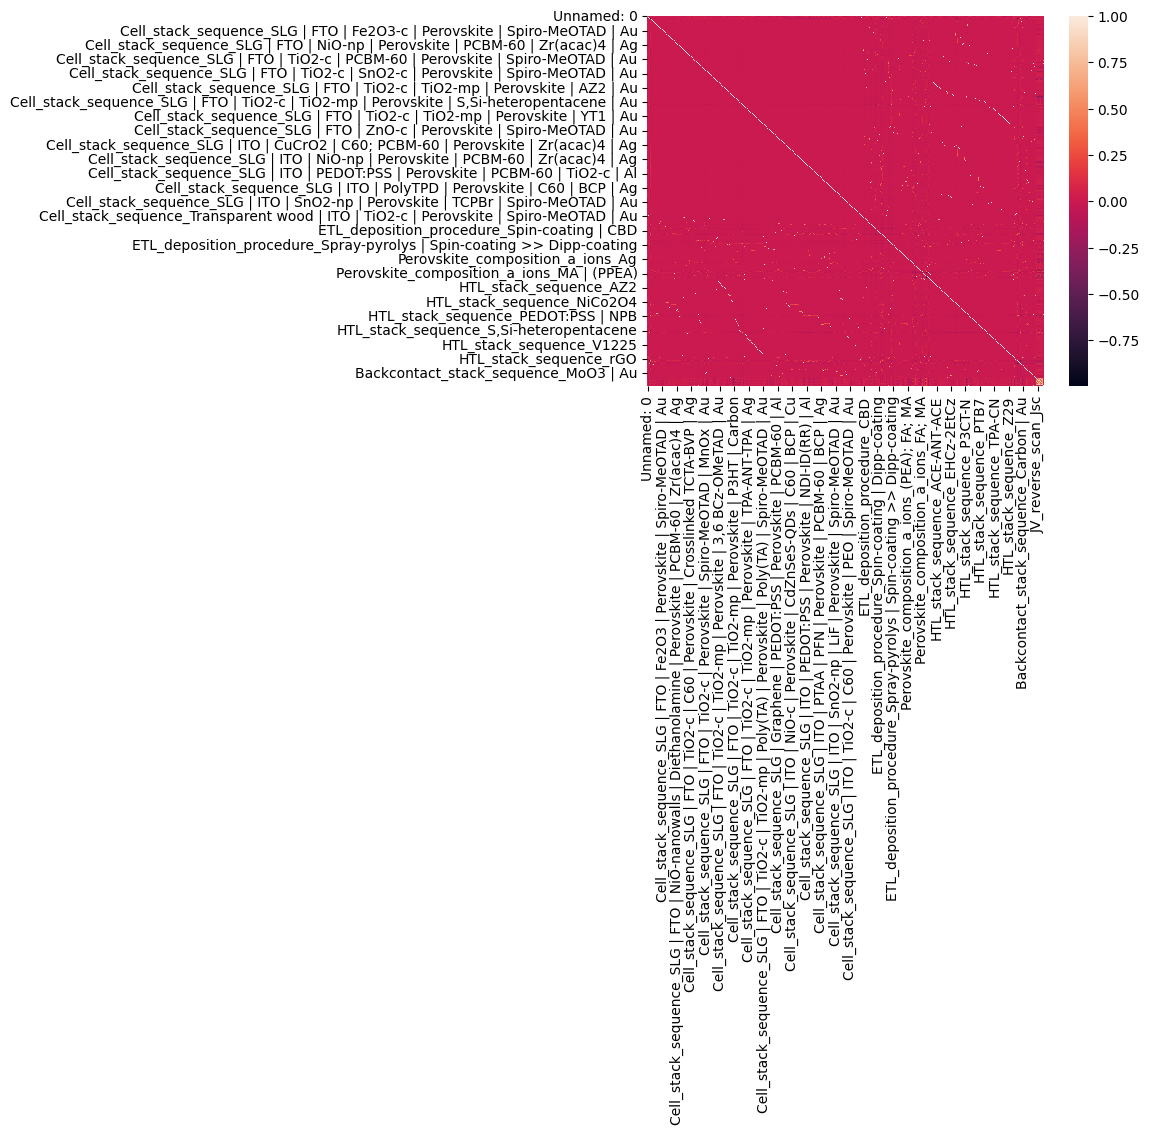

In [44]:
fullcorrelation = fdata.corr()
sn.heatmap(fullcorrelation)